### Chapter3. Evaluation metrics

对于无监督学习方法，常用的分类评价指标如下：

- $Accuracy$
- $Precision$
- $Recall$
- $F1\ Score$
- $Area\ under\ the\ ROC\ curve\ or\ simply\ AUC$
- $Log\ loss$
- $Precision\ at\ k$
- $Average\ precision\ at\ k$
- $Mean\ average\ precision\ at\ k$

常用的回归评价指标如下：

- $Mean\ absoluted\ error\ (MAE)$
- $Mean\ squared\ error\ (MSE)$
- $Root\ mean squared\ error\ (RMSE)$
- $Root\ mean squared\ logarithmic\ error\ (RMSLE)$
- $Mean\ percentage\ error\ (MPE)$
- $Mean\ absolute\ percentage\ error\ (MAPE)$
- $R^2$

##### 3.1 **Accuracy**

In [2]:
# handing accuracy rate
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    correct_count = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_count += 1
    # return accuracy
    return correct_count / len(y_true)

In [3]:
from sklearn import metrics
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]
metrics.accuracy_score(l1, l2)

0.625

$$
Accuracy\ Score = (TP + TN) / (TP + TN + FP + FN)
$$

In [4]:
def true_positive(y_true, y_pred):
    """
    predicts positive, actual target also is positive.
    """
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    predicts negative, actual target also is negative.
    """
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    predicts positive, actual target is negative.
    """
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
           fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    predicts negative, actual target is positive.
    """
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn 

In [5]:
def accuracy_v2(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [6]:
accuracy_v2(l1, l2)

0.625

##### 3.2 **Precision**

$$
Precision = \frac{TP}{TP + FP}
$$

&emsp;&emsp;Precision（精确率，查准率）指标表示预测为正的样本有多少是真正的正样本，查准率。

In [7]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

In [8]:
precision(l1, l2)

0.6666666666666666

##### 3.3 **Recall**

$$
Recall = \frac{TP}{TP + FN}
$$

&emsp;&emsp;Recall（召回率，查全率）样本中的正例有多少被预测正确了。

In [9]:
def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn  = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [10]:
recall(l1, l2)

0.5

##### 3.4 **F1 Score**

$$
F1 = \frac{2P \times R}{P + R}\ 或\ F1 = \frac{2TP}{2TP + FP + FN}
$$

&emsp;&emsp;F1 Score结合精确率与召回率的指标。

In [11]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)

    score = 2 * p * r / (p + r)
    return score

##### 3.5 **TPR**

$$
TPR = \frac{TP}{TP + FN}
$$

&emsp;&emsp;TPR（True Positive Rate）,与召回率定义相同。这两个指标也称为敏感性。

In [12]:
def tpr(y_true, y_pred):
    return recall(y_true, y_pred)

##### 3.6 **FPR**

$$
FPR = \frac{FP}{TN + FP}
$$

同时$1-FPR$被称为specificity或是$True\ Negative\ Rate$或是$TNR。
$

In [13]:
def fpr(y_true, y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (fp + tn)

##### 3.7  **Area Under ROC Curve (AUC)**

In [14]:
tpr_list = []
fpr_list = []

y_true = [0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1]

y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
        0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
        0.85, 0.15, 0.99]

thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
            0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

for thresh in thresholds:
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    temp_tpr = tpr(y_true, temp_pred)
    temp_fpr = fpr(y_true, temp_pred)
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

Text(0, 0.5, 'TPR')

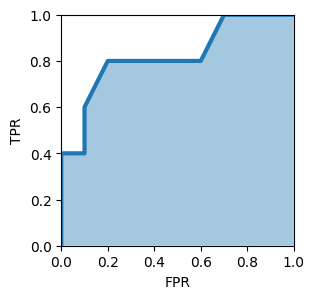

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("FPR", fontsize=10)
plt.ylabel("TPR", fontsize=10)

&emsp;&emsp;上图的曲线为*Receiver Operating Characteristic (ROC)*

In [16]:
# 使用sklearn计算
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

##### 3.8 **log loss**

In [19]:
import numpy as np

def log_loss(y_true, y_proba):
    epsilon = 1e-15
    loss = []
    for yt, yp in zip(y_true, y_proba):
        yp = np.clip(yp, epsilon, 1 - epsilon)
        temp_loss = -1.0 * (
            yt * np.log(yp)
            + (1 - yt) * np.log(1 - yp)
        )
        loss.append(temp_loss)
    return np.mean(loss)

In [20]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba =[0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]
log_loss(y_true, y_proba)

0.49882711861432294

In [21]:
# sklearn
from sklearn import metrics

metrics.log_loss(y_true, y_proba)

0.49882711861432294